## Ecuaciones Diferenciasles Ordinarias - Problemas de Valor Inicial

Una ecuacion diferencial ordinaria es una relacion entre una funcion $f(x)$, su variable dependiente $x$ y cualqueir numero de sus derivadas. Una ecuación diferencial ordinaria o EDO es una ecuación diferencial donde la variable independiente, y por lo tanto también las derivadas, están en una dimensión. Asumimos que una EDO puede escribirse
$$F\left(x,f(x),\dfrac{df(x)}{dx},\ldots,\dfrac{d^{n-1}f(x)}{dx^{n-1}}\right)=\dfrac{d^nf(x)}{dx^n},$$
donde $F$ es una función arbitraria que incorpora uno o todos los argumentos de entrada, y $n$ es el orden de la ecuación diferencial. Esta ecuación se denomina EDO de n-esimo orden.

Para dar un ejemplo de una EDO, considere un péndulo de longitud $l$ con una masa $m$, en su extremo. El ángulo que forma el péndulo con el eje vertical a lo largo del tiempo, $\theta(t)$, en presencia de gravedad vertical $g$, se puede describir mediante la ecuación del péndulo, que es la EDO
$$ml\dfrac{d^2\theta(t)}{dt^2}=-mg\sin(\theta(t)).$$

Considerando angulos muy pequenos, sabemos que $\sim(\theta)\approx\theta$, por tanto
$$l\dfrac{d^2\theta}{dt}=-g\theta.$$
En este sentido, $\theta(t)=\theta_0\cos\left(\sqrt{\dfrac{g}{l}t}\right)$ es una solucion general, siempre que la condicion inicial sea $\theta(t=0)=\theta_0$.

## Reduccion de orden

Consideremos la sigueinte EDO
$$f^{(n)}(t)=F\big(t,f'(t),\ldots,f^{(n-1)}(t)\big).$$
Es util tomar el estado
$$S(t)=\begin{bmatrix} f(t) \\ f'(t) \\ \vdots \\ f^{(n-1)}(t) \end{bmatrix},$$
pues podemos ver que
$$\dfrac{d}{dt}S(t)=\begin{bmatrix} f'(t) \\ f^{(2)}(t) \\ \vdots \\ f^{(n)}(t) \end{bmatrix}= \begin{bmatrix} S_2(t) \\ S_3(t) \\ \vdots \\ F\big(t,f'(t),\ldots,f^{(n-1)}(t)\big) \end{bmatrix}.$$

Este metodo nos permite reescribir cualquier EDO en un sistema de EDSs de primer orden.

En particular para nuestro ejemplo del pendulo, ele stado lo podemos definir como
$$S(t)=\begin{bmatrix} \theta(t) \\ \theta'(t)\end{bmatrix}.$$
Y por tando obtenemos
$$\dfrac{d}{dt}S(t)=\begin{bmatrix} 0 & 1 // -\dfrac{g}{l} & 0\end{bmatrix}S(t).$$

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline 

## Metodo de Euler

En este metodo hacemos una discretizacion del intervalo y utilizamos diferencias finitas para reemplazar las derivadas y convertir nuestra EDO en un sistema de ecuaciones.

Por ejemplo, consideremos la EDO
$$\dfrac{d}{dt}S(t)=F(t,S(t)),$$
utilizando la aproximacion de diferencias finitas hacia adelante tenemos
$$S(t_{j+1})=S(t_j)+hF(t_j,S(t_j)).$$
A esta formula se la conoce como **Euler Explicita**, que permite calcular una paroximacion del estado $S(t_{j+1})$ dado el estado $S(t_j)$. Empezando por $S_0=S(t_0)$.

Resolvamos numericamente la EDO
$$\dfrac{df(t)}{dt}=e^{-t}, f(t=0)=-1.$$
Esta EDo tiene por solucion exacta $f(t)=-e^{-t}$.

In [2]:
# Definimos parametros
f = lambda t, s: np.exp(-t) # EDO
h = 0.1 # tamano del paso
t = np.arange(0, 1 + h, h) # Malla
s0 = -1 # Condicion inicial

In [3]:
# Metodo de Euler Explicito
s = np.zeros(len(t))
s[0] = s0

for i in range(0, len(t) - 1):
    s[i + 1] = s[i] + h*f(t[i], s[i])

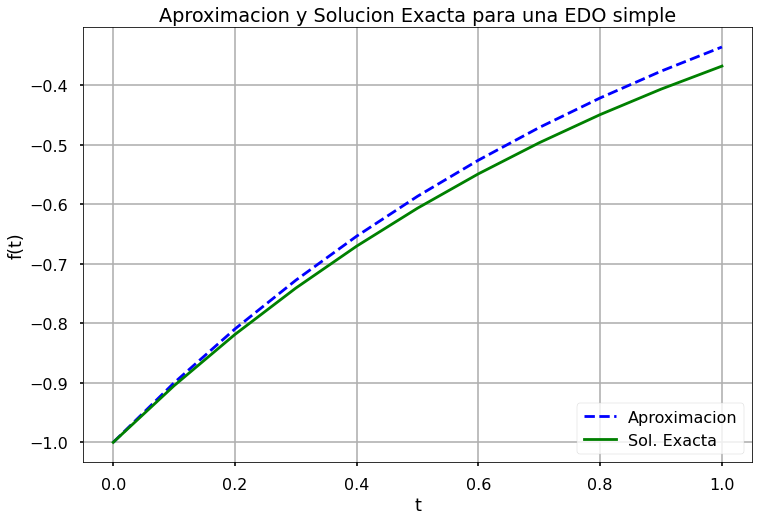

In [4]:
plt.figure(figsize = (12, 8))
plt.plot(t, s, 'b--', label='Aproximacion')
plt.plot(t, -np.exp(-t), 'g', label='Sol. Exacta')
plt.title('Aproximacion y Solucion Exacta para una EDO simple')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.grid()
plt.legend(loc='lower right')
plt.show()

### Error numerico  y Estabilidad

Vamos a hacer una comparacion entre los Metodos de Euler implicito y explicito, con la regla del trapecio y la solucion exacta.

In [5]:
h = 0.1 # tamano de paso
t = np.arange(0, 5.1, h) # malla
w = 4 # frecuancia de oscilacion del pendulo
s0 = np.array([[1], [0]]) # Condicion inicial

In [6]:
# Euler Explicito
m_e = np.array([[1, h], 
               [-w**2*h, 1]])

# Euler Implicito
m_i = inv(np.array([[1, -h], 
               [w**2*h, 1]]))

# Metodo del Trapecio
m_t = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

In [7]:
s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

In [8]:
# hacemos las integraciones
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])

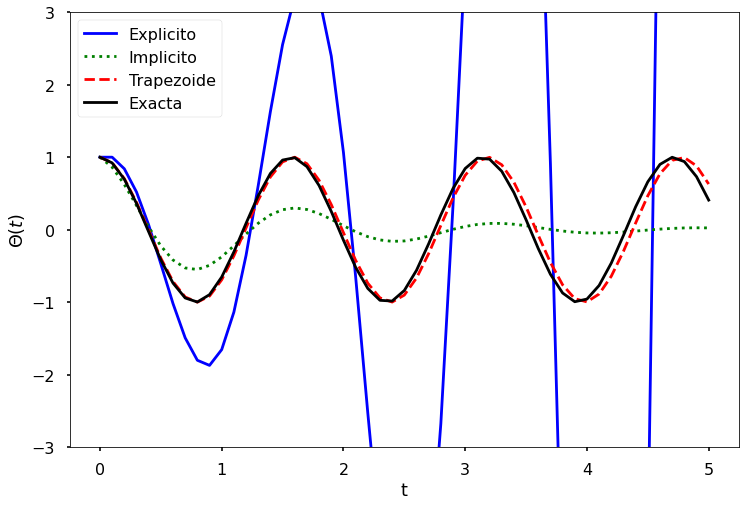

In [9]:
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicito', 'Implicito', \
            'Trapezoide', 'Exacta'])
plt.show()

## Metodo de Runge Kutta

Los métodos de Runge Kutta son uno de los métodos más utilizados para resolver EDOs. A diferencia del método de Euler que utiliza los dos primeros términos de la serie de Taylor para aproximar la integración numérica, los metodos de Runge Kutta utilizamas terminos, y estos metodos se ramifican dependiendo el numero de terminos a utilizar.

### Metodo de Runge Kutta de Segundo orden

Consideremos $\dfrac{d}{dt}S(t)=F(t,S(t))$, podemos asumir una formula de integracion de la forma
$$S(t+h)=S(t)+c_1F(t,S(t))h+c_2F\big(t+ph,S(t)+qhF(t,S(T))\big)h.$$
Los los aprametros $c_q$, $c_2$, $p$ y $q$ pueden econtrarse igualando la formula anterior a la expansion en Series de Taylor de segundo orden de $S(t)$. De donde, una eleccion popular suele ser $$c_1,c_2=\dfrac{1}{2}, \quad p,q=1.$$

De donde el metodo queda como
$$\begin{cases} k_1=F(t_j,S(t_j)) \\ k_2=F\big(t_j+ph,S(t_j)+qhk_1\big) \\ S(t_{j+1})=S(t_j)+\dfrac{1}{2}(k_1+k_2)h \end{cases}$$

### Metodo de Runge Kutta de Segundo orden

El metodo de Runge Kutta de orden 4 se ve como
$$\begin{cases} k_1=F(t_j,S(t_j)) \\ k_2=F\big(t_j+\dfrac{h}{2},S(t_j)+\dfrac{1}{2}k_1h\big) \\ k_3=F\big(t_j+\dfrac{h}{2},S(t_j)+\dfrac{1}{2}k_2h\big) \\ k_4=F(t_j+h,S(t_j)+k_3h) \\ S(t_{j+1})=S(t_j)+\dfrac{h}{6}(k_1+2k_3+2k_3+k_4). \end{cases}$$

Este metodo tiene orden $O(h^4)$.

## Solvers de EDOs de Python

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

Necesitamos un objetp funcion F que calcule $$\begin{cases} \dfrac{d}{dt}S(t)=F(t,S(t)) \\ S(t_0)=S_0,\end{cases}$$ donde $t$ es una nvariable independiente unidimensional (tiempo), $S(t)$ es una funcion vector valuada n-dimensional (estado), y $F(t,S(t))$ define una EDO. $S_0$ el valor inicial para $S$. La funcion $F$ debe ser de la forma $dS=F(t,S)$.

La forma de utilizar el solver es: `solve_ivp(fun, t_span, s0, method = 'RK45', t_eval=None)`
- `fun` toma la función en el lado derecho del sistema.
- `t_span` es el intervalo de integración `(t0,tf)`, donde `t0` es el inicio y `tf` es el final del intervalo. `s0` es el estado inicial.
- Hay un par de métodos que podemos elegir, el predeterminado es `RK45`, que es el método explícito de Runge-Kutta de orden 5 o 4 respectivamente. También hay otros métodos que puede utilizar.
- `t_eval` toma en cuenta los tiempos en los que almacenar la solución calculada, y debe ordenarse y estar dentro de `t_span`.

Consideremos la EDO $$\dfrac{d}{dt}S(t)=\cos(t)$$ con valor inicial $S_0=0$. La solucion exactqa es $S(t)=\sin(t)$.

In [11]:
# Definimos la funcion F
F = lambda t, s: np.cos(t)

# El intervalo de la EDO
t_eval = np.arange(0, np.pi, 0.1)

# Resolvemos la EDO
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

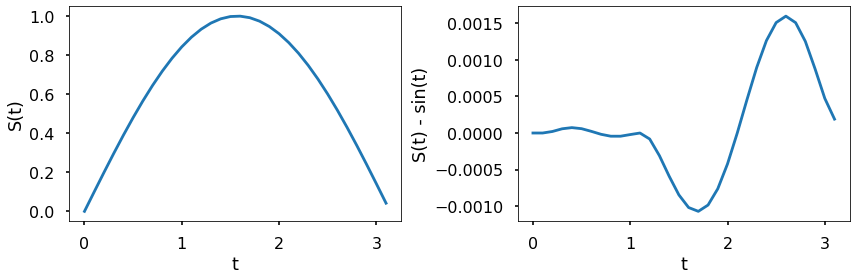

In [12]:
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

Usando `rtol` y `atol` para hacer la diferencia entre la solución aproximada y la exacta es menor que `1e-7`.

In [13]:
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, rtol = 1e-8, atol = 1e-8)

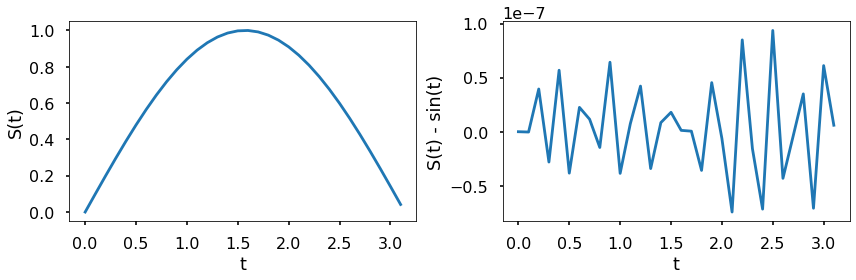

In [14]:
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

Consideremos la EDo $$\dfrac{d}{dt}S(t)=-S(t),$$ con valor inicial $S_0=1$. La solucion exacata es $S(t)=e^{-t}$.

In [15]:
# Definamos la funcion F
F = lambda t, s: -s

# Malla del tiempo
t_eval = np.arange(0, 1.01, 0.01)

# Calculo de la Solucion aproximada
ol = solve_ivp(F, [0, 1], [1], t_eval=t_eval)

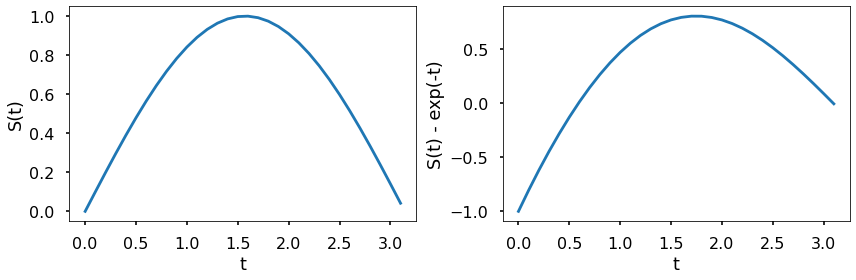

In [16]:
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.exp(-sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - exp(-t)')
plt.tight_layout()
plt.show()

Consideremos el sistema de EDOs $$\dfrac{d}{dt}S(t)=\begin{bmatrix} 0  & t^2 \\ -t & 0\end{bmatrix}S(t),$$ con condicion inicial $S_0=\begin{bmatrix} 1 \\ 1 \end{bmatrix}$.

In [17]:
# Definamos la funcion vector valuada F
F = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)

# Discretizacion del tiempo
t_eval = np.arange(0, 10.01, 0.01)

# Calculo de la Solucion
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

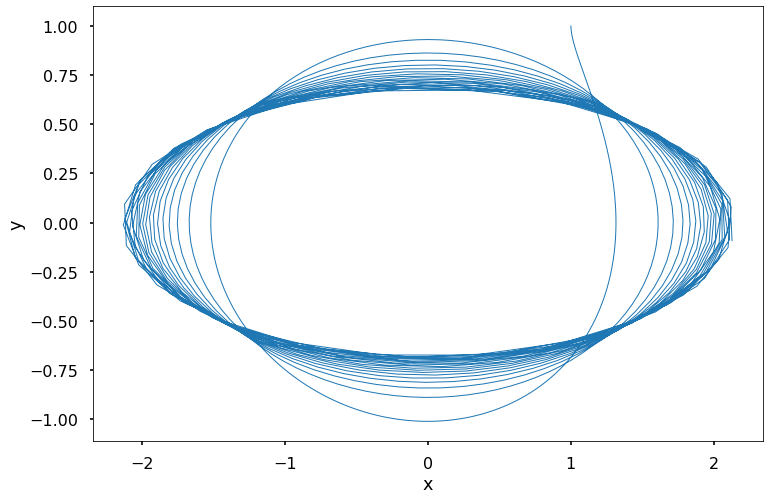

In [18]:
plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1], linewidth=1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Metodos Multipaso

Solo vimos un metodo multipaso (Runge Kutta), sin embargo hay varios metodos y los mas usuales son: metodo de Adams–Bashforth, metodo de Adams–Moulton y las formulas de diferenciacion hacia atras (BDFs).

## Rigidez EDO (Stiffness ODE)

La **rigidez** es un concepto difícil e importante en la solución numérica de EDOs. Una EDO rígida hará que la solución que se busca varíe lentamente y no sea estable, es decir, si hay soluciones cercanas, la solución cambiará drásticamente. Esto nos obligará a dar pequeños pasos para obtener resultados razonables. Por lo tanto, la rigidez suele ser un problema de eficiencia: si no nos preocupamos por el costo de cálculo, no nos preocuparíamos por la rigidez.

A menudo necesitamos modelar fenómenos físicos con escalas de tiempo o escalas espaciales muy diferentes. Estas aplicaciones generalmente conducen a sistemas de EDOs cuya solución incluye varios términos con magnitudes que varían con el tiempo a un ritmo significativamente diferente. Por ejemplo, un sistema de masa de resorte, en el que la masa puede oscilar de izquierda a derecha y oscilar hacia arriba y hacia abajo debido al resorte. Por lo tanto, tenemos dos escalas de tiempo diferentes, es decir, la escala de tiempo del movimiento de balanceo y la del movimiento de oscilación. Si el resorte es realmente rígido, la escala de tiempo del movimiento de oscilación será mucho más pequeña que la del movimiento de balanceo. Para estudiar el sistema, tenemos que usar un paso de tiempo muy pequeño para obtener una buena solución para la oscilación.

Según las propiedades de la EDO y el nivel de precisión deseado, es posible que debamos usar diferentes métodos para `solve_ivp`. Como sugiere la documentación de esta funcion, el método `RK45` o `RK23` para problemas no rígidos y `Radau` o `BDF` para problemas rígidos. Si no está seguro, primero intente ejecutar `RK45`. Si esta solución experimenta un número inusualmente alto de iteraciones, divergencias o fallas, es probable que este problema sea rígido y debe usar `Radau` o `BDF`. `LSODA` también puede ser una buena opción universal, pero podría ser un poco menos conveniente trabajar, ya que envuelve el código antiguo de Fortran.